In [228]:
import pharmacokinetic as pk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import sympy as sym


In [229]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
t = np.array([ 0.,    0.25,  0.5,   1. ,   2. ,   3.,    4.,    6. ,   8.  , 10.  , 12. ,  24.  ])
c = np.array([0.00e+00, 1.33e-03, 1.64e-03, 1.55e-03, 8.56e-04, 5.98e-04, 4.37e-04, 2.50e-04, 1.78e-04, 1.33e-04, 1.06e-04, 2.57e-05])
bodyweight = None
internvention_unit = "gram"
intervention_value = 0.03

In [231]:
interp1d(t,c)

In [232]:
pk.f_pk(t=t,c=c,compound="codeine",dose=intervention_value,dose_unit="gram",bodyweight=bodyweight,)


{'compound': 'codeine',
 'dose': 0.03,
 'dose_unit': 'gram',
 'bodyweight': None,
 'bodyweight_unit': 'kg',
 'auc': 0.0062377000000000005,
 'auc_unit': '(mg/L)*(h)',
 'aucinf': 0.006341535037437155,
 'aucinf_unit': '(mg/L)*(h)',
 'tmax': 0.5,
 'tmax_unit': 'h',
 'cmax': 0.00164,
 'cmax_unit': 'mg/L',
 'tmaxhalf': 0.25,
 'tmaxhalf_unit': 'h',
 'cmaxhalf': 0.00133,
 'cmaxhalf_unit': 'mg/L',
 'kel': 0.16707979946415216,
 'kel_unit': '1/(h)',
 'thalf': 4.148599548137856,
 'thalf_unit': 'h',
 'vd': 31.359515688532664,
 'vd_unit': 'L',
 'cl': 5.239541592532971,
 'cl_unit': '(L)/(h)',
 'slope': -0.16707979946415216,
 'intercept': -6.9520756490774716,
 'r_value': -0.9583994325049597,
 'p_value': 4.6418084068862605e-05,
 'std_err': 0.018807394845471902,
 'max_idx': 2}

In [227]:
#t = np.array([ 1,    2,  3,   4. ,   6. ,   8.,    10.,  24   ])
#c = np.array([11.07, 9.03,6.43, 5.03, 2.87, 1.65, 1.25, 0.26])

In [159]:
pk.f_pk(t=t,c=c,compound="caffeine")

{'compound': 'caffeine',
 'dose': nan,
 'dose_unit': 'mg',
 'bodyweight': nan,
 'bodyweight_unit': 'kg',
 'auc': 49.400000000000006,
 'auc_unit': '(mg/L)*(h)',
 'aucinf': 119.42518738871459,
 'aucinf_unit': '(mg/L)*(h)',
 'tmax': 1.0,
 'tmax_unit': 'h',
 'cmax': 11.07,
 'cmax_unit': 'mg/L',
 'tmaxhalf': nan,
 'tmaxhalf_unit': 'h',
 'cmaxhalf': nan,
 'cmaxhalf_unit': 'mg/L',
 'kel': 0.1556604271615078,
 'kel_unit': '1/(h)',
 'thalf': 4.45294409889265,
 'thalf_unit': 'h',
 'vd': nan,
 'vd_unit': 'L',
 'cl': nan,
 'cl_unit': '(L)/(h)',
 'slope': -0.1556604271615078,
 'intercept': 2.140106922718233,
 'r_value': -0.9681077596158681,
 'p_value': 0.00034293023351267304,
 'std_err': 0.018015091234375717,
 'max_idx': 0}

NameError: name 'auc' is not defined

In [43]:
intercept

-7.706698296049

-3.6634931584654846

In [52]:
from scipy.interpolate import InterpolatedUnivariateSpline, CubicSpline
def quadratic_spline_roots(spl):
    roots = []
    knots = spl.get_knots()
    for a, b in zip(knots[:-1], knots[1:]):
        u, v, w = spl(a), spl((a+b)/2), spl(b)
        t = np.roots([u+w-2*v, w-u, 2*v])
        t = t[np.isreal(t) & (np.abs(t) <= 1)]
        roots.extend(t*(b-a)/2 + (b+a)/2)
    return np.array(roots)

f = InterpolatedUnivariateSpline(t, c, k=4)
cr_pts = quadratic_spline_roots(f.derivative())
cr_pts = np.append(cr_pts, (t[0], t[-1]))  # also check the endpoints of the interval
cr_vals = f(cr_pts)
min_index = np.argmin(cr_vals)
max_index = np.argmax(cr_vals)
print("Maximum value {} at {}\nMinimum value {} at {}".format(cr_vals[max_index], cr_pts[max_index], cr_vals[min_index], cr_pts[min_index]))

Maximum value 0.0016388839268441538 at 0.4963338192593272
Minimum value -0.00015460604062789553 at 19.174476387059517


In [56]:
[slope, intercept, r_value, p_value, std_err, max_index] = pk._regression(t,c)
auc_d = -intercept / slope * np.exp(slope * t[-1])


In [ ]:
auc

In [103]:
auc_rest = c[-1]/-slope

In [104]:
auc_rest

0.00021505655332268044

In [86]:
auc_d = -intercept / slope * np.exp(slope * t[-1])
auc_d

-3.6634931584654846

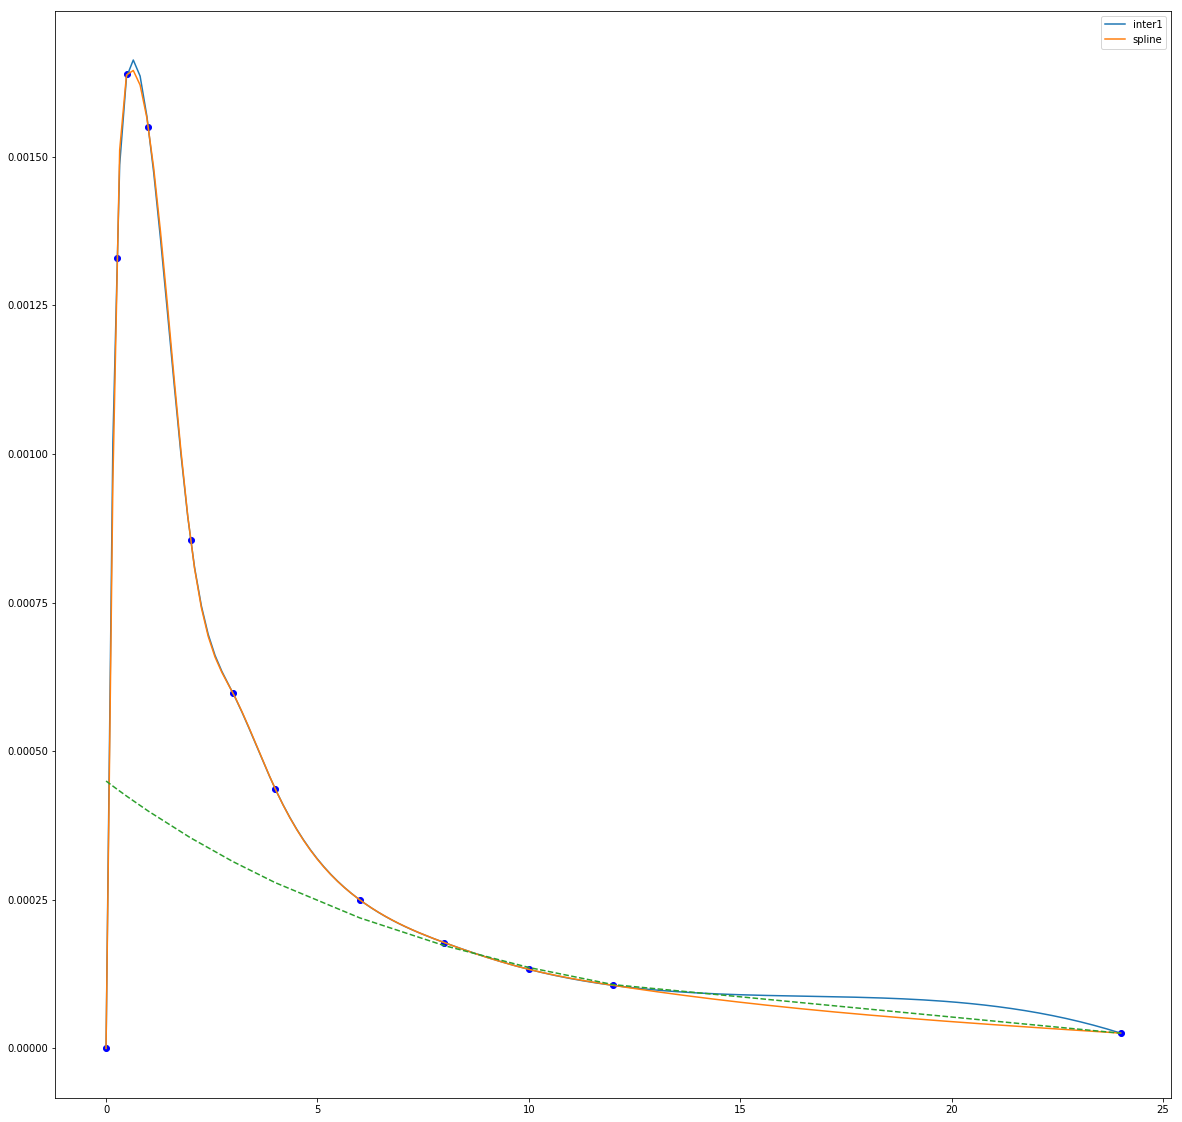

In [132]:
plt.subplots(figsize=(20,20))
plt.plot(t,c, 'bo')
t_n = np.linspace(0,24,num=150)
f2 = interp1d(t,c, kind='cubic')
cs = CubicSpline(t,c,bc_type='natural')

#plt.plot(t_n,f(t_n))
plt.plot(t_n,f2(t_n,), label="inter1")
plt.plot(t_n,cs(t_n), label="spline")
plt.plot(t,np.exp(intercept) * np.exp(slope * t), "--")

plt.legend()

In [109]:
auc_d = -intercept / slope * np.exp(slope) * c[-1]
auc_d = 

-0.0014706907124727975

In [139]:
np.exp(intercept) - 0.000449

8.041482501768655e-07

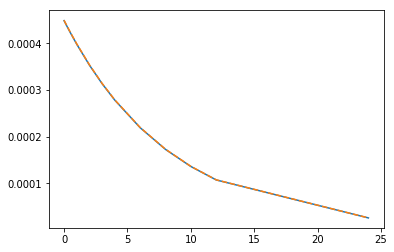

In [140]:
plt.plot(t,0.000449*np.exp(slope*t))
plt.plot(t,np.exp(intercept) * np.exp(slope * t), "--")


In [238]:
slope_tend = -np.exp(intercept)*slope * np.exp(slope * t[-1])
delta_t = -c[-1]/slope_tend

#(delta_t*c[-1])/2
delta_t

-8.41631061371889

In [239]:
-c[-1]/slope
slope_tend

3.053594523722553e-06

In [233]:
auc_d = (-c[-1] / slope) * 1
auc_d

0.00021505655332268044

In [55]:
cs()

TypeError: __call__() missing 1 required positional argument: 'x'

In [199]:
timecourse_data = {

"mean": [
np.nan,
9.84e-06,
8.54e-06,
7.74e-06,
6.20e-06,
5.15e-06,
4.34e-06,
3.41e-06,
3.02e-06,
1.80e-06,
1.25e-06,
7.40e-07
],
"sd": [
None,
"1.14e-06",
"9.00e-07",
"1.19e-06",
"1.42e-06",
"1.64e-06",
"1.71e-06",
"1.76e-06",
"1.60e-06",
"1.21e-06",
"7.00e-07",
"4.60e-07"
],
"se": [
None,
"4.65e-07",
"3.67e-07",
"4.86e-07",
"5.80e-07",
"6.70e-07",
"6.98e-07",
"7.19e-07",
"6.53e-07",
"4.94e-07",
"2.86e-07",
"1.88e-07"
],
"cv": [
None,
"1.16e-01",
"1.05e-01",
"1.54e-01",
"2.29e-01",
"3.18e-01",
"3.94e-01",
"5.16e-01",
"5.30e-01",
"6.72e-01",
"5.60e-01",
"6.22e-01"
],
"unit": "mole / liter",
"tissue": "saliva",
"time": [
1.00e+00,
2.00e+00,
3.00e+00,
4.00e+00,
6.00e+00,
8.00e+00,
1.00e+01,
1.20e+01,
1.40e+01,
2.40e+01,
3.20e+01,
4.80e+01
],
"time_unit": "hr",
}

In [200]:
pk.f_pk(t = np.array(timecourse_data["time"]), c = np.array(timecourse_data["mean"]),compound="caffeine")

{'compound': 'caffeine',
 'dose': nan,
 'dose_unit': 'mg',
 'bodyweight': nan,
 'bodyweight_unit': 'kg',
 'auc': nan,
 'auc_unit': '(mg/L)*(h)',
 'aucinf': nan,
 'aucinf_unit': '(mg/L)*(h)',
 'tmax': 1.0,
 'tmax_unit': 'h',
 'cmax': nan,
 'cmax_unit': 'mg/L',
 'tmaxhalf': nan,
 'tmaxhalf_unit': 'h',
 'cmaxhalf': nan,
 'cmaxhalf_unit': 'mg/L',
 'kel': 0.05649785850947921,
 'kel_unit': '1/(h)',
 'thalf': 12.26855670013845,
 'thalf_unit': 'h',
 'vd': nan,
 'vd_unit': 'L',
 'cl': nan,
 'cl_unit': '(L)/(h)',
 'slope': -0.05649785850947921,
 'intercept': -11.682784744831093,
 'r_value': -0.9731400875841281,
 'p_value': 4.803949695358867e-07,
 'std_err': 0.004455194049335189,
 'max_idx': 0}

220.41201140449962
240.15659347619857
240.15659347619857
240.20122349776526


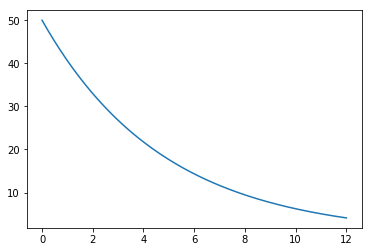

In [243]:
el = 3.47e-03*60
c1 = 50
t = np.linspace(0,12,200)
t_inf = np.linspace(0,50,200)
def f(t):
    return c1 * np.exp(-el*t)
plt.plot(t, f(t))


#auc_rest = (c1/el)*np.exp(-el*t[-1])
#print(auc_rest + pk._auc(t, f(t)))
print(pk._auc(t, f(t)))
auc_d = f(t[-1])/pk._kel(t,f(t))

print(pk._auc(t, f(t)) + auc_d)
print(pk._aucinf(t, f(t)))

print(pk._auc(t_inf, f(t_inf)))

#kel =  pk._kel(t, f(t))
#print(kel)
#auc_d =  (c1 / kel) * np.exp(- kel * t[-1])
#print(auc_d)

In [174]:
pk.f_pk(t =t, c = c,compound="caffeine")

/home/janekg89/Develop/Pycharm_Projects/pkdb_analysis/codeine/pharmacokinetic.py:80: UserWarning: Regression could not be calculated on timecourse curve.
  warnings.warn("Regression could not be calculated on timecourse curve.")


{'compound': 'caffeine',
 'dose': nan,
 'dose_unit': 'mg',
 'bodyweight': nan,
 'bodyweight_unit': 'kg',
 'auc': nan,
 'auc_unit': '(mg/L)*(h)',
 'aucinf': nan,
 'aucinf_unit': '(mg/L)*(h)',
 'tmax': 32.0,
 'tmax_unit': 'h',
 'cmax': nan,
 'cmax_unit': 'mg/L',
 'tmaxhalf': 1.0,
 'tmaxhalf_unit': 'h',
 'cmaxhalf': 8.39e-06,
 'cmaxhalf_unit': 'mg/L',
 'kel': nan,
 'kel_unit': '1/(h)',
 'thalf': nan,
 'thalf_unit': 'h',
 'vd': nan,
 'vd_unit': 'L',
 'cl': nan,
 'cl_unit': '(L)/(h)',
 'slope': nan,
 'intercept': nan,
 'r_value': nan,
 'p_value': nan,
 'std_err': nan,
 'max_idx': nan}

In [177]:
np.nanargmax(c)


0